## Data_Science_Machine_Learning Project_Employee_Turnover_Analytics

In [ ]:
"""
My project worked on the dataset “HR_comma_sep.csv” obtained from the MS AI  Machine Learning using Python with Python program with Simplilearn. 
I received permission to work on this dataset and to upload my work on Python code and results to my GitHub account. The goal of this analysis is 
to show my Python coding skills with results using dataset associated with (Employee Turnover Analytics) project.

"""


In [ ]:
"""
Objective:

The main goal of this project is to make an end to end python ML pipeline for analyzing and predicting employee turnover at Portobello Tech.
Using the give data having satisfaction level, last evaluation, project workload, working hours, tenure, promotions, department, and salary,
the aim is to  find  whether employee leave the company with using  the appropriate  ways such as cluster employees who left based on work 
satisfaction,  class imbalance using SMOTE, and evaluating multiple classification models (Logistic Regression, Random Forest, Gradient Boosting)
through cross-validation. By providing the best model and analyzing its predictions, the project aims to offer HR guidance on improving employee 
retention strategies.


"""

## Check data quality

In [1]:
# Load pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv("HR_comma_sep.csv")

# data structure
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Find number of rows and columns
df.shape

(14999, 10)

In [5]:
# list the column names
df_columns = df.columns
df_columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
# Use ".str.strip()" to drop any whitespace from columns names. 
df.columns = df_columns.str.strip()
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [9]:
# Rename the "sales" column to "department"

if "department" not in df.columns and "sales" in df.columns:  # True and True give True. Go forward
    df.rename(columns = {"sales": "department"}, inplace = True)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# Make a new column, "average_monthly_hours" instead of "average_montly_hours"

if "average_monthly_hours" not in df.columns and "average_montly_hours" in df.columns:
    df["average_monthly_hours"] = df["average_montly_hours"]
    
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,average_monthly_hours
0,0.38,0.53,2,157,3,0,1,0,sales,low,157
1,0.80,0.86,5,262,6,0,1,0,sales,medium,262
2,0.11,0.88,7,272,4,0,1,0,sales,medium,272
3,0.72,0.87,5,223,5,0,1,0,sales,low,223
4,0.37,0.52,2,159,3,0,1,0,sales,low,159


In [13]:
# review the number of missing rows in each column
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
average_monthly_hours    0
dtype: int64

In [15]:
# Find the number of duplicate rows 
df.duplicated().sum()    # I found 3008 duplicates . This creates wrong model evaluation. We need to fix this issue. 

3008

In [17]:
# view the data type in each column
df.dtypes      # types are float, int, object (string)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
average_monthly_hours      int64
dtype: object

In [19]:
# use missing number of rows and corresponding percentage to make a data frame.
df_miss_rows = pd.DataFrame({"missing rows": df.isna().sum(), "missing rows in percentage": df.isna().mean()*100})
df_miss_rows

,missing rows,missing rows in percentage
satisfaction_level,0,0.0
last_evaluation,0,0.0
number_project,0,0.0
average_montly_hours,0,0.0
time_spend_company,0,0.0
Work_accident,0,0.0
left,0,0.0
promotion_last_5years,0,0.0
department,0,0.0
salary,0,0.0


In [21]:
# save the above dataframe into csv file. 
df_miss_rows.to_csv("miss_rows_percent.csv", index = True)

## Understand what factors contributed most to employee turnover at Exploratory Data Analysis (EDA).

In [24]:
# look at a heatmap of the correlation matrix between all numerical features in the data.

In [26]:
# take all the numerical features

numerical_columns = ["satisfaction_level", "last_evaluation", "number_project", "time_spend_company", "Work_accident", "left",
       "promotion_last_5years", "average_monthly_hours"]

print(numerical_columns)

['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'average_monthly_hours']


In [28]:
# take the numerical features only appeared in the dataset
numerical_columns = [i for i in numerical_columns if i in df.columns]

display(numerical_columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'average_monthly_hours']

In [30]:
# make the correlation matrix between all numerical features 

correlation_matrix = df[numerical_columns].corr()

correlation_matrix

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,average_monthly_hours
satisfaction_level,1.000000,0.105021,-0.142970,-0.100866,0.058697,-0.388375,0.025605,-0.020048
last_evaluation,0.105021,1.000000,0.349333,0.131591,-0.007104,0.006567,-0.008684,0.339742
number_project,-0.142970,0.349333,1.000000,0.196786,-0.004741,0.023787,-0.006064,0.417211
time_spend_company,-0.100866,0.131591,0.196786,1.000000,0.002120,0.144822,0.067433,0.127755
Work_accident,0.058697,-0.007104,-0.004741,0.002120,1.000000,-0.154622,0.039245,-0.010143
left,-0.388375,0.006567,0.023787,0.144822,-0.154622,1.000000,-0.061788,0.071287
promotion_last_5years,0.025605,-0.008684,-0.006064,0.067433,0.039245,-0.061788,1.000000,-0.003544
average_monthly_hours,-0.020048,0.339742,0.417211,0.127755,-0.010143,0.071287,-0.003544,1.000000


In [32]:
# Look at values
correlation_matrix.values

array([[ 1.        ,  0.10502121, -0.14296959, -0.10086607,  0.05869724,
        -0.38837498,  0.02560519, -0.02004811],
       [ 0.10502121,  1.        ,  0.34933259,  0.13159072, -0.00710429,
         0.00656712, -0.00868377,  0.3397418 ],
       [-0.14296959,  0.34933259,  1.        ,  0.19678589, -0.00474055,
         0.02378719, -0.00606396,  0.41721063],
       [-0.10086607,  0.13159072,  0.19678589,  1.        ,  0.00212042,
         0.14482217,  0.06743293,  0.12775491],
       [ 0.05869724, -0.00710429, -0.00474055,  0.00212042,  1.        ,
        -0.15462163,  0.03924543, -0.01014289],
       [-0.38837498,  0.00656712,  0.02378719,  0.14482217, -0.15462163,
         1.        , -0.06178811,  0.07128718],
       [ 0.02560519, -0.00868377, -0.00606396,  0.06743293,  0.03924543,
        -0.06178811,  1.        , -0.00354441],
       [-0.02004811,  0.3397418 ,  0.41721063,  0.12775491, -0.01014289,
         0.07128718, -0.00354441,  1.        ]])

[0 1 2 3 4 5 6 7]


[0 1 2 3 4 5 6 7]




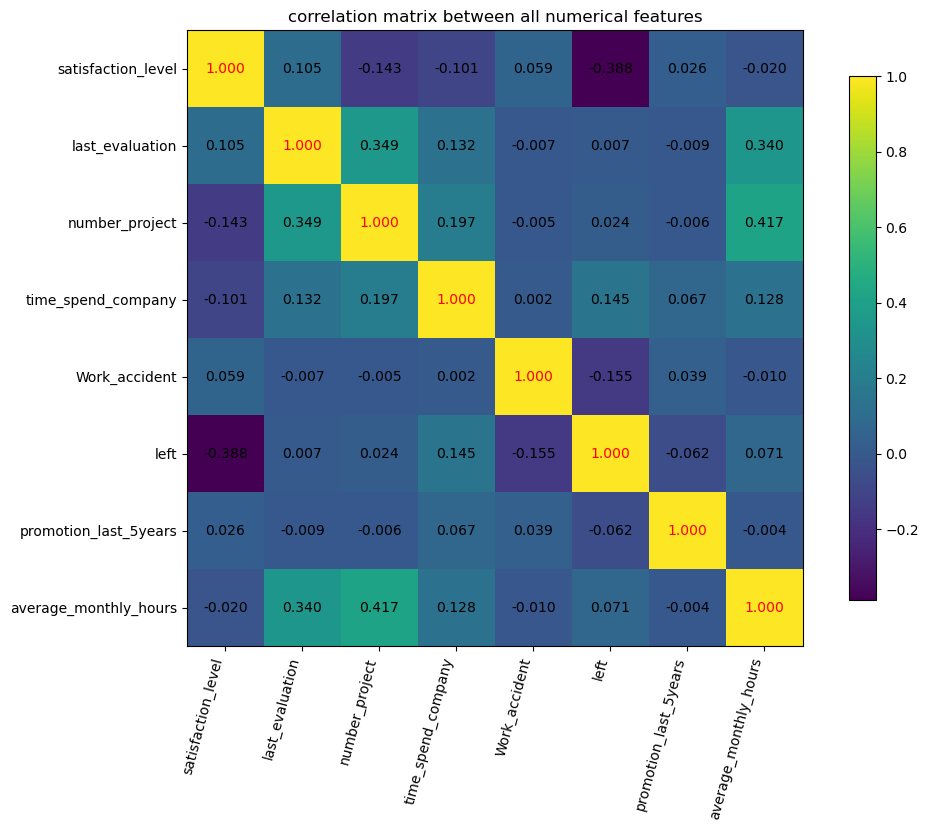

In [34]:
# Heatmap

# Load  matplotlib library
import matplotlib.pyplot as plt

# Load numpy library
import numpy as np

figure, axes = plt.subplots(figsize = (10, 8))

heatmap = axes.imshow(correlation_matrix.values, aspect = "equal", interpolation = "nearest")


len_number = len(correlation_matrix.columns)

num_xticks = np.arange(len_number)

print(num_xticks)

axes.set_xticks(num_xticks)

print("\n")

num_yticks = num_xticks

print(num_yticks)

print("\n")

axes.set_yticks(num_yticks)

cols_names = correlation_matrix.columns

axes.set_xticklabels(cols_names , rotation = 75, ha = "right", va = "top", color = "black")

axes.set_yticklabels(cols_names, color = "black")

corr_values = correlation_matrix.values
for (a, b), correlation_value in np.ndenumerate(corr_values):
    axes.text(b, a, f"{correlation_value:.3f}", va = "center",  fontsize = 10 , ha="center", color = "red" if abs(correlation_value) > 0.6 else "black")

axes.set_title("correlation matrix between all numerical features")

figure.colorbar(heatmap, fraction = 0.07, pad = 0.06, orientation = "vertical", shrink = 0.85)

plt.show()


### Draw the distribution plots:


In [37]:
"""
Take these:

# Employee Satisfaction

# Employee Evaluation

# Employee Average Monthly Hours
"""


'\nTake these:\n\n# Employee Satisfaction\n\n# Employee Evaluation\n\n# Employee Average Monthly Hours\n'

['satisfaction_level', 'last_evaluation', 'average_monthly_hours']




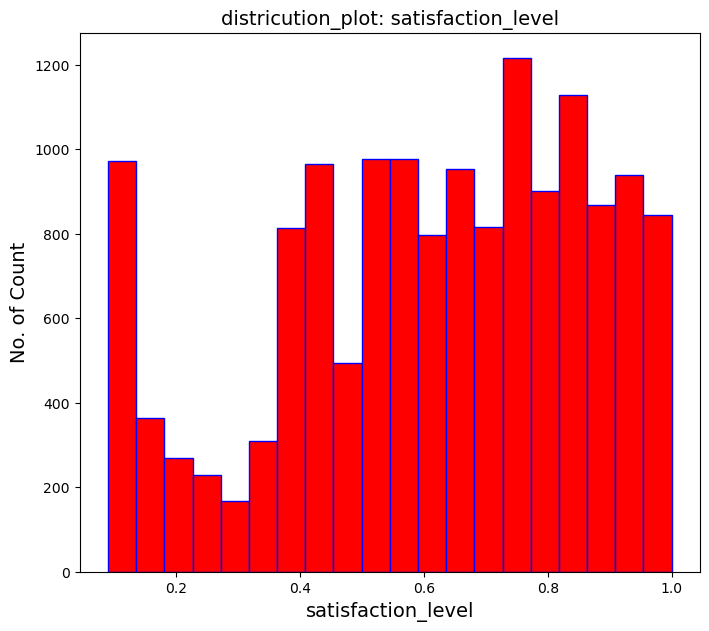

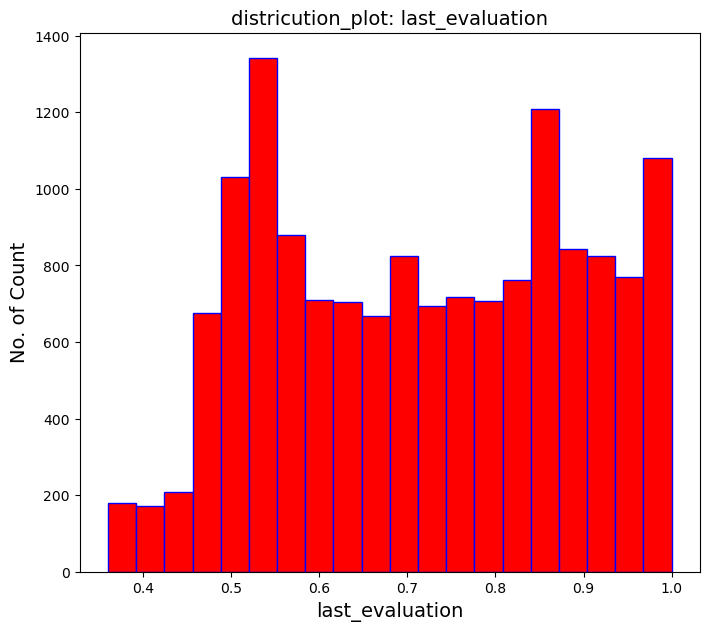

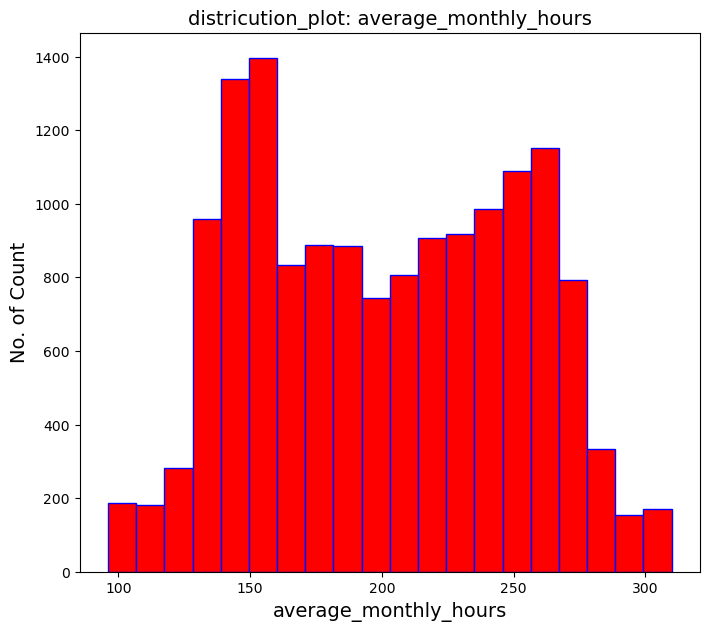

In [36]:
#distribution_plot_list =  ["satisfaction_level", "last_evaluation", "average_monthly_hours"]

distribution_featurers = [col for col in ["satisfaction_level", "last_evaluation", "average_monthly_hours"] if col in df.columns]

print(distribution_featurers)

print("\n")

for feature in distribution_featurers:
    df_dropna = df[feature].dropna()   # take off missing values
    plt.figure(figsize = (8, 7))
    plt.hist(df_dropna, bins = 20, color = "red", edgecolor = "blue")
    plt.title(f"districution_plot: {feature}", fontsize = 14,  loc = "center")
    plt.xlabel(feature, fontsize = 14)
    plt.ylabel("No. of Count", fontsize = 14)
    #plt.show()
    

In [42]:
# Draw the bar plot of the employee project count of both employees who left and stayed in the organization.

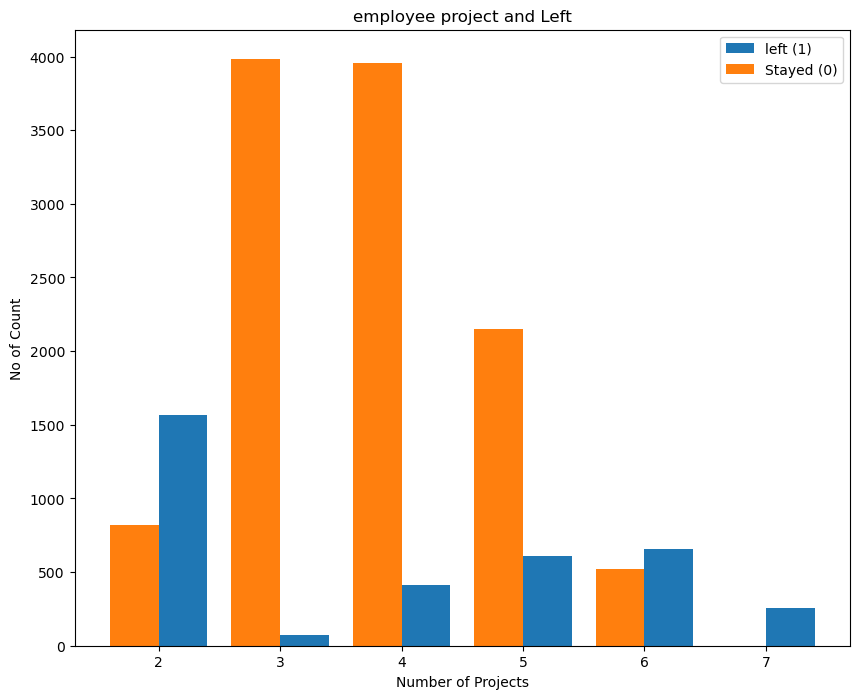

In [38]:

if  "left" in df.columns and "number_project" in df.columns:  # if true, we need to move forward. 
    number_project_left_counts = df.groupby(["number_project", "left"]).size()   # count employees each group
    total_counts = number_project_left_counts.unstack(fill_value = 0) # Get dataframe with "number_project" (index), 2 columns (0, and 1)  
    projects_number =  total_counts.index.tolist()      # a list of "number_project"
    
    left_1 = total_counts.get(1, pd.Series(0, index = projects_number))   # total coount for 1 (left)
    
    left_0 = total_counts.get(0, pd.Series(0, index = projects_number))    # # total coount for 0 (stayed)
                 
    x = np.arange(len( projects_number))
    
    plt.figure(figsize = (10, 8))

    width = 0.4
    
    plt.bar(x+0.2, left_1, width = width, label = "left (1)") # plot a bar for label = "left (1)"
    
    plt.bar(x-0.2, left_0, width = width, label = "Stayed (0)")  # plot a bar for label = " Stayed (0)"

    plt.title("employee project and Left")
    
    plt.xticks(x,  projects_number)
    
    plt.xlabel("Number of Projects")
    
    plt.ylabel("No of Count")
    
    plt.legend()
    
    plt.show()


## Perform clustering of employees who left based on their satisfaction and evaluation.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


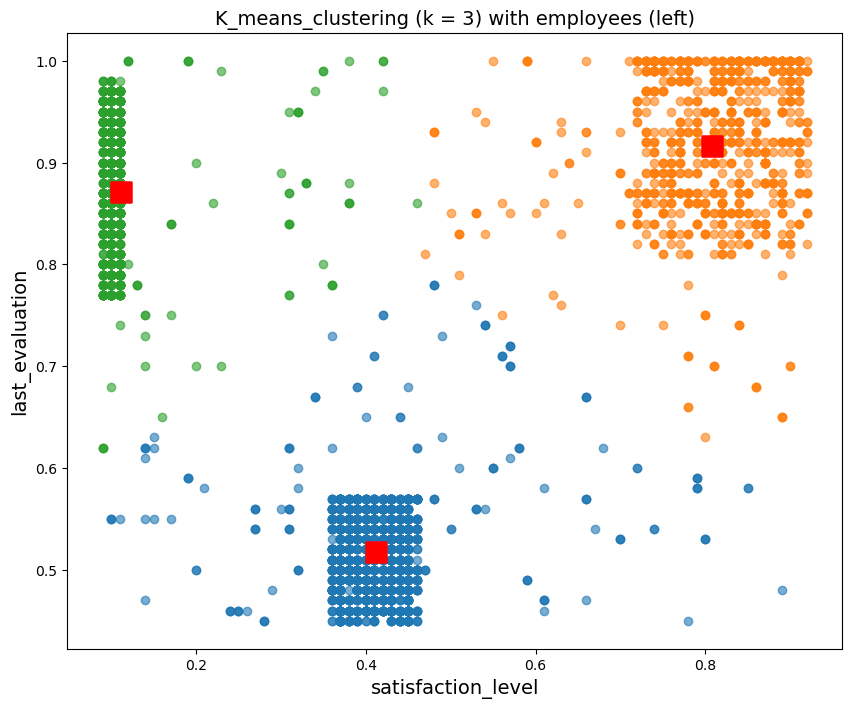



count:
          satisfaction_level  last_evaluation
cluster                                     
0                      1667             1667
1                       965              965
2                       939              939


mean:
          satisfaction_level  last_evaluation
cluster                                     
0                  0.412304         0.517265
1                  0.808031         0.916415
2                  0.111321         0.870884


std:
          satisfaction_level  last_evaluation
cluster                                     
0                  0.066943         0.047611
1                  0.077337         0.069475
2                  0.046548         0.064958


In [42]:
# Select columns "satisfaction_level", "last_evaluation", and "left".

if set(["satisfaction_level", "last_evaluation", "left"]).issubset(df.columns):   # if true, please move forward. 
    
    plt.figure(figsize = (10, 8))
    
    # take left employees
    left_employees = df[df["left"] == 1]

    # sep-up StandardScaler()
    standard_scaler = StandardScaler()

    # drop missing values in the ["satisfaction_level", "last_evaluation"] columns
    df_employees_left = left_employees.dropna(subset = ["satisfaction_level", "last_evaluation"]).copy()

    # Take 2 featurers for  K means clustering 
    sat_last_cols = df_employees_left[["satisfaction_level", "last_evaluation"]]

    
    # fit standard scaler to "satisfaction_level", and "last_evaluation" and transform to mean = 0, and varience = 1. 
    standard_scaler_fit = standard_scaler.fit_transform(sat_last_cols)

    # conduct Kmeans clustering with 3 clusters
    K_means_clustering = KMeans(n_clusters = 3, random_state = 101, n_init = 15).fit(standard_scaler_fit)

    # make a cluster column with cluster labels
    df_employees_left["cluster"] = K_means_clustering.labels_

    # go back to base dataset 
    cluster_centers = standard_scaler.inverse_transform(K_means_clustering.cluster_centers_)
    

    # scatter plot
    for i in sorted( df_employees_left["cluster"].unique()):
        
        data_1 = df_employees_left[df_employees_left["cluster"] == i]
        
        plt.scatter( data_1["satisfaction_level"], data_1["last_evaluation"], label = f"C{i}", alpha = 0.6)
    
    plt.scatter(cluster_centers[:, 0],  cluster_centers[:,1], linewidth = 1.8,  s = 200, c = "r",  marker = "s", label = "cluster_centers")
    
    plt.title("K_means_clustering (k = 3) with employees (left)",  fontsize = 14)
    plt.xlabel("satisfaction_level",  fontsize = 14)
    plt.ylabel("last_evaluation",  fontsize = 14)
    plt.show()

    # find count, mean, and std
    
    print("\n")
    print("count:\n", df_employees_left.groupby("cluster")[["satisfaction_level", "last_evaluation"]].count())
    
    print("\n")
    print("mean:\n", df_employees_left.groupby("cluster")[["satisfaction_level", "last_evaluation"]].mean())
    
    print("\n")
    print("std:\n", df_employees_left.groupby("cluster")[["satisfaction_level", "last_evaluation"]].std())
    

## Handle the left Class Imbalance using the SMOTE technique.

In [44]:
# Pre-process the data by converting categorical columns to numerical columns


#  categorical columns
dep_sal_col = [i for i in ["department", "salary"] if i in df.columns]
#print(dep_sal_col)



numerical_columns = [j for j in df.columns if df[j].dtype in [np.float64, np.int64] and j != "left"]

for i in dep_sal_col:
    df[i] = df[i].astype(str).str.strip().str.lower()
    #print(i)
    #print(df[i])

# Apply get_dummies() to the categorical variables

df_categorical_variables = pd.get_dummies(df[dep_sal_col], drop_first = False) if dep_sal_col else pd.DataFrame(index = df.index)
#print(df_categorical_variables)

# Separate from original dataset
df_numerical_columns = df[numerical_columns].copy()

# combining categorical variables and numeric variables
X = pd.concat([df_numerical_columns, df_categorical_variables], axis = 1)
#print(X)

y = df["left"].astype(int)
#print(y)



In [46]:
# Do the stratified split of the dataset to train and test in the ratio 80:20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)

In [48]:
# Upsample the train dataset using the SMOTE technique from the imblearn module.


# load the resample function 
from sklearn.utils import resample

# Look at SMOTE if it works

smote_technique = True

try:               # if works, take this. Otherwise we need to take "except" path
    from imblearn.over_sampling import SMOTE
    print("smote")
except ImportError:
    smote_technique = False
    print("SMOTE is not working. We need to use other technique such as upsampling")

# do sampling if SMOTE doe not work. 
if smote_technique:                   # if not true, we need to go into else
    smote_random = SMOTE(random_state = 123)
    X_train_random, y_train_random = smote_random.fit_resample(X_train, y_train)
    
    #print(X_train_random)
    
    #print("\n")
    
    #print(y_train_random)
                                                                                                                   
else:              # Do upsampling when SMOTE does not work
    concat_df_train = pd.concat([X_train, y_train], axis = 1)     # join _train, and y_train
    
    left_1 = concat_df_train[concat_df_train["left"] == 1]   # look at class = 1
    
    left_0 = concat_df_train[concat_df_train["left"] == 0]   # look at class = 0
    
    # do upsampling to left_1 which is will to the left_0 size. 
    upsampling_left_1 = resample(left_1, replace = True, n_samples = len(left_0), random_state = 123)
    
    concat_upsampling_left_1_0 = pd.concat([upsampling_left_1,  left_0 ])  # combine 2 classes (left_1, a)d (left_a)

    # get X featurer from the concat_upsampling_left_1_0
    X_train_random = concat_upsampling_left_1_0.drop(columns = ["left"])

     # get y label from the concat_upsampling_left_1_0
    y_train_random = concat_upsampling_left_1_0["left"]




smote


## Perform 5-fold cross-validation model training and evaluate performance.


In [51]:
""" 
Goals:
Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report. 

"""


' \nGoals:\nTrain a logistic regression model, apply a 5-fold CV, and plot the classification report.\nTrain a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.\nTrain a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report. \n\n'

In [53]:
# standarding the X_train_random data
X_train_drop_left_scalar  = standard_scaler.fit_transform(X_train_random)

#print(X_train_drop_left_scalar )

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# make a dictionary for 3 models
models_L_R_G = {"LogisticRegression": LogisticRegression(max_iter = 950, random_state = 123), 
               "RandomForest_Classifier": RandomForestClassifier(n_estimators = 160, random_state = 123),
               "GradientBoosting_Classifier": GradientBoostingClassifier(n_estimators = 160, random_state = 123)}

from sklearn.model_selection import StratifiedKFold

# make 5 fold cross validation

cross_validation = StratifiedKFold (n_splits = 5, shuffle = True, random_state = 123)

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import classification_report, confusion_matrix

# Do "for loop" for 3 models

for model_name, model_cross_validation in models_L_R_G.items():
    y_prediction_cross_validation = cross_val_predict(model_cross_validation, X_train_drop_left_scalar, y_train_random, cv = cross_validation, method = "predict")

    # look at classification_report
    print(f"{model_name}---\n", classification_report(y_train_random, y_prediction_cross_validation))
    
    print("\n")
    
    confusion_matrix_model = confusion_matrix( y_train_random, y_prediction_cross_validation )
    
    print("Results: confusion matrix \n", confusion_matrix_model)
    

LogisticRegression---
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      9142
           1       0.81      0.81      0.81      9142

    accuracy                           0.81     18284
   macro avg       0.81      0.81      0.81     18284
weighted avg       0.81      0.81      0.81     18284



Results: confusion matrix 
 [[7450 1692]
 [1774 7368]]
RandomForest_Classifier---
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.99      0.98      0.99      9142

    accuracy                           0.99     18284
   macro avg       0.99      0.99      0.99     18284
weighted avg       0.99      0.99      0.99     18284



Results: confusion matrix 
 [[9086   56]
 [ 200 8942]]
GradientBoosting_Classifier---
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      9142
           1       0.98      0.95      0

##	Identify the best model and justify the evaluation metrics used.

In [68]:
"""
Identify the best model and justify the evaluation metrics used:

Find the ROC/AUC for each model and plot the ROC curve.
Find the confusion matrix for each of the models.
Explain which metric needs to be used from the confusion matrix: Recall or Precision?

"""

'\nIdentify the best model and justify the evaluation metrics used:\n\nFind the ROC/AUC for each model and plot the ROC curve.\nFind the confusion matrix for each of the models.\nExplain which metric needs to be used from the confusion matrix: Recall or Precision?\n\n'

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2286
           1       0.54      0.69      0.61       714

    accuracy                           0.79      3000
   macro avg       0.72      0.75      0.73      3000
weighted avg       0.81      0.79      0.80      3000

confusion matrix:
 [[1871  415]
 [ 222  492]]
 LogisticRegression with roc auc score: 0.8208


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

confusion matrix:
 [[2267   19]
 [  18  696]]
 RandomForest_Classifier with roc auc score: 0.9947


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.93      0.9

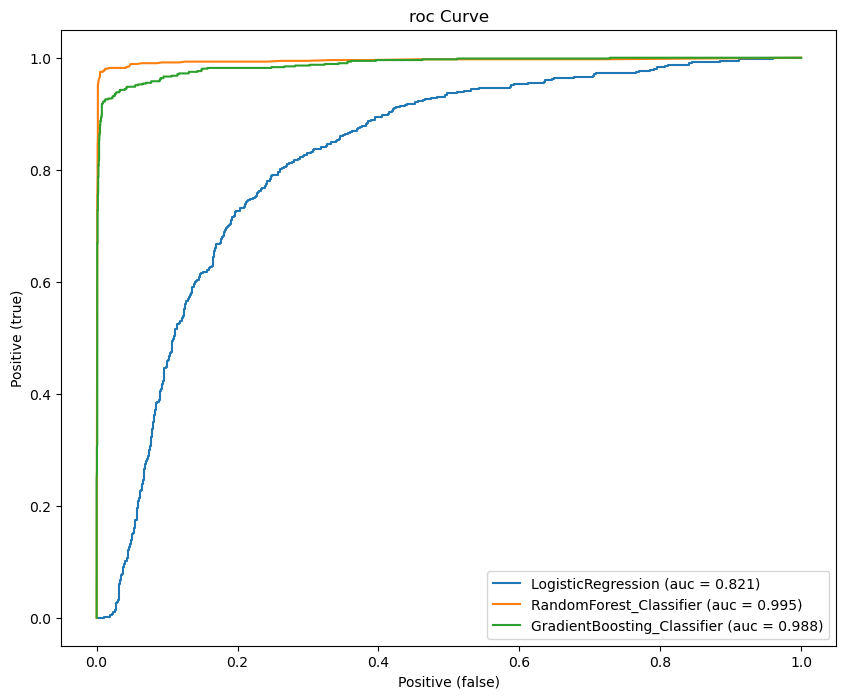



best model:
 RandomForestClassifier(n_estimators=160, random_state=123)


model with high roc auc score:
 RandomForest_Classifier


In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# make a dictionary to collect all outcomes coming from 3 models

test_performance = {} 


# Apply standard_scaler to the X_test dataset
X_test_scale = standard_scaler.transform(X_test)

# Use for loop to go through all models one by one

plt.figure(figsize = (10, 8))

for model_name, classifier_object in models_L_R_G .items():
    
    # need model to be trained
    classifier_object.fit(X_train_drop_left_scalar, y_train_random)
    
    # probability is predicted from test dataset with  class (1)
    y_probability_test = classifier_object.predict_proba(X_test_scale)[:, 1]

    # Take True (1) at y_probability_test >= 0.5 and False (0) at y_probability_test < 0.5
    y_prediction_test = (y_probability_test >= 0.5).astype(int)

    print(classification_report (y_test, y_prediction_test))
    
    confusion_matrix_test = confusion_matrix (y_test, y_prediction_test)
    print("confusion matrix:\n", confusion_matrix_test)

    # Find the roc_auc_score                              
    roc_auc_value = roc_auc_score(y_test, y_probability_test)
                                  
    print(f" {model_name} with roc auc score: {roc_auc_value:.4f}")
                                  
    # store all results each model 
    test_performance[model_name] = {
        "model_name": classifier_object,
        "roc_auc_value": roc_auc_value,
        "conf_matrix_test": confusion_matrix_test,
        "y_probability_test": y_probability_test,
        "y_prediction_test": y_prediction_test
    }

    print("\n")

    #print(test_performance[model_name])
    
    # See false  and true positive values
    false_positive, true_positive, _ = roc_curve(y_test, y_probability_test)

    # The roc curve plot with model name
    plt.plot(false_positive, true_positive , label = f"{model_name} (auc = {roc_auc_value:.3f})") 


plt.xlabel("Positive (false)")
    
plt.ylabel("Positive (true)")
    
plt.title("roc Curve")
    
plt.legend()
    
plt.show()

print("\n")

# Identify the best model under the roc_auc_score

model_name_high_roc_auc_score = max(test_performance.items(), key=lambda key_value: key_value[1]["roc_auc_value"])[0] # [0] for model name
# take value from key_value[1]["roc_auc_value"]

best_model = test_performance[model_name_high_roc_auc_score]["model_name"]


print("best model:\n", best_model)

print("\n")

print("model with high roc auc score:\n", model_name_high_roc_auc_score )

In [70]:
""" 

Using the best model, predict the probability of employee turnover in the test data.
Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

■	Safe Zone (Green) (Score < 20%)
■	Low-Risk Zone (Yellow) (20% < Score < 60%)
■	Medium-Risk Zone (Orange) (60% < Score < 90%)
■	High-Risk Zone (Red) (Score > 90%).  """


' \n\nUsing the best model, predict the probability of employee turnover in the test data.\nBased on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.\n\n■\tSafe Zone (Green) (Score < 20%)\n■\tLow-Risk Zone (Yellow) (20% < Score < 60%)\n■\tMedium-Risk Zone (Orange) (60% < Score < 90%)\n■\tHigh-Risk Zone (Red) (Score > 90%).  '

In [72]:

# Do not overwrite the X_test dataset
test_df = X_test.copy()

test_df["true_left"] = y_test.values               # values: 0 and 1

# look at predicted probability
y_probability_test = test_performance[model_name_high_roc_auc_score]["y_probability_test"]


test_df["pred_proba_left"] = y_probability_test


# make a function
def category_employees_zones(prob_score):
    if prob_score < 0.2:
        return "safe_zone_green"
    elif 0.2 <= prob_score < 0.6:
        return "low_risk_zone_orange"
    elif 0.6 <= prob_score < 0.9:
        return "medium_risk_zone_orange"
    else:
        return "high_risk_zone_red"

# apply the category function
test_df["four_zones"] = test_df["pred_proba_left"].apply( category_employees_zones)

print(test_df["four_zones"].value_counts())             

four_zones
safe_zone_green            2174
high_risk_zone_red          649
low_risk_zone_orange        119
medium_risk_zone_orange      58
Name: count, dtype: int64


In [ ]:
# save the test_df into the csv file
test_df.to_csv("test_prediction_with_probabilities_02.csv", index = True)


In [ ]:
"""

Conclusion:
This project showed that employee turnover is modeled with machine learning techniques. The analysis presented main features influencing attrition,
for instances poor satisfaction levels, long working hours, and lack of promotions. Clustering highlighted different groups of employees who are 
more likely to leave, while SMOTE balanced the dataset to improve model fairness. Among the tested models, ensemble methods (Random Forest and
Gradient Boosting) show higher roc-auc and recall scores, making them more appropriate for turnover prediction. Finally, by categorizing employees 
into risk zones, the analysis presented clear strategies that can help HR address employee concerns, improve satisfaction, and then reduce attrition. 

"""
